In [1]:
import pandas as pd

# Zadanie 1

In [2]:
data = pd.read_csv("https://stooq.pl/q/d/l/?s=vow3.de&d1=20180101&d2=20211231&i=d", parse_dates=["Data"])
data.head()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

# Zadanie 2

### Nazwa akcji: Volkswagen AG
### Skrót dla akcji: VOW.DE
### Branża: Motoryzacyjna - koncern motoryzacyjny
### Historia: 
Koncern powstał w 1937 roku na gruncie potrzeby produkcji taniego, rodzinnego samochodu którą Adolf Hitler przedłożył Ferdinandowi Porche, nadwornemu konstruktorowi
nazistowskich Niemiec. W 1938 roku do seryjnej produkcji został oddany pierwszy model VW populary "Garbus", a fabryka KdF-Wagen wykorzystywała robotników przymusowych i więźniów obozów koncentracyjnych.

W kolejnych dekadach Volkswagen rozwijał się, a w 1991 roku rozpoczęto ekspansję w nowe kierunki, takie jak otwarcie spółki w Chinach i Polsce. 
Powstała również Volkswagen Finanz GmbH, oferująca usługi finansowe. 
W 1998 roku koncern utworzył fundusz pomocy dla byłych robotników przymusowych.

W XXI wieku Volkswagen kontynuował ekspansję i inwestycje, jak np. Autostadt w 2000 roku oraz przejęcie przez MAN SE spółki Volkswagen Caminhōes e Ônibus w 2009 roku. 
Jednakże w 2015 roku koncern został wstrząśnięty aferą dotyczącą manipulacji wynikami pomiarów emisji w swoich pojazdach tzw. Diesel Gate, 
Mimo to, Volkswagen nadal odgrywa znaczącą rolę w przemyśle motoryzacyjnym, będąc także sponsorem klubu piłkarskiego VfL Wolfsburg.


### Wydarzenia mające wpływ na notowania spółki w danym okresie (2018-2021)
Na wykresie widzimy znaczącą wyprzedaż akcji koncernu skutującą obniżeniem wyceny jej akcji na skutek pandemii COVID19 która przypadała na marzec 2019.
Następnie na skutek stymulusu fiskalnego i zapomóg pandemicznych, globalnie giełdy notowały wzrosty co również przełożyło się na wzrost cenę akcji VW. 

# Zadanie 3

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


min_date = datetime.fromtimestamp(data["Data"].min().timestamp())
max_date = datetime.fromtimestamp(data["Data"].max().timestamp())
d = relativedelta(max_date, min_date)
quarters = d.years * 4 + d.months // 3 + 1
x_ticks = [min_date + relativedelta(months=3*i) for i in range(quarters+1)]


fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(data["Data"], data["Zamkniecie"], label="Kursy zamknięcia VW")
ax.legend()
ax.set_xticks(x_ticks)
plt.show()

# Zadanie 4

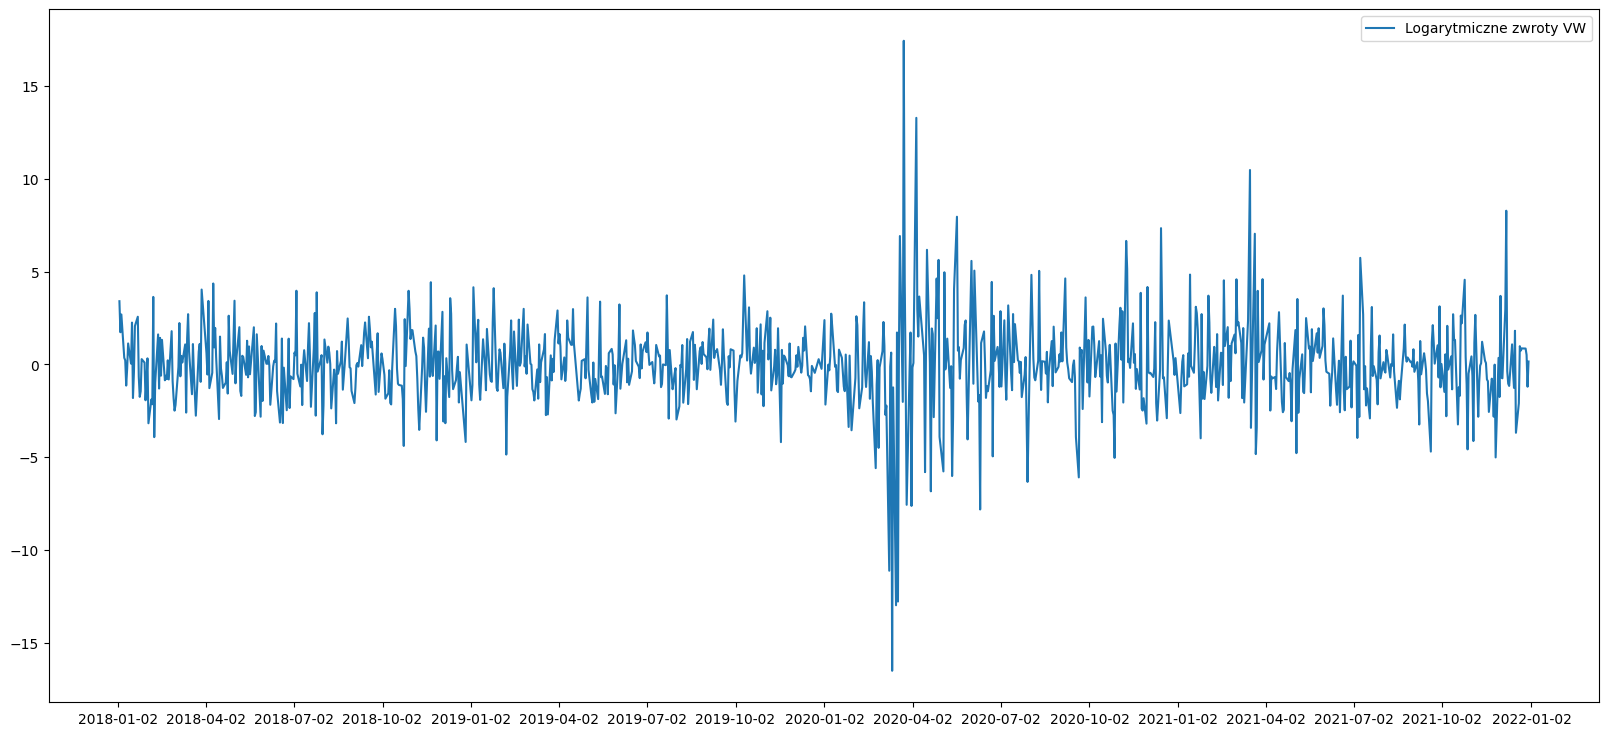

In [37]:
import numpy as np

def make_stationary(x:np.ndarray):
    # return 100 * (x[1:] - x[:-1])
    return 100 * (np.log(x[1:]) - np.log(x[:-1]))

log_returns = make_stationary(data["Zamkniecie"].values)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(data.loc[1:, "Data"], log_returns, label="Logarytmiczne zwroty VW")
ax.legend()
ax.set_xticks(x_ticks)
plt.show()

# Zadania 5-9

In [38]:
log_returns = pd.DataFrame(log_returns, columns=["Logartymiczne zwroty VW"])
log_returns.describe()

,Logartymiczne zwroty VW
count,1009.000000
mean,0.015916
std,2.300384
min,-16.501493
25%,-1.108679
50%,-0.012921
75%,1.055295
max,17.433991


Średnia logarytmicznych zwrotów w badanym okresie wynosi 0.015, co mówi o średnio dodatnim wyniku wynikającym z zakupu akcji na początku rozważanego okresu i sprzedaży na jego końcu.

In [29]:
# Współczynnik zmienności
log_returns.std() / log_returns.mean()

Logartymiczne zwroty VW    144.529029
dtype: float64

In [36]:
# Skośność i Kurtoza nadwyżkowa
log_returns.skew().values[0], (log_returns.kurtosis() - 3).values[0]

(-0.00945022835761155, 6.702335837462236)

Rozkład charakteryzuje się małą skośnością, masa prawdopodobieństwa rozkłada się w okolicach średniej, natomiast
ze względu na wysoką wartość kurtozy nadwyżkowej możemy wnioskować o leptokurtyczności rozkładu logarytmicznych zwrotów, co przekłada się na
większą ilość skrajnych zwrotów lub strat niż wynikało by to z rozkładu normalnego. Aby się o tym przekonać przeprowadzimy test Jarque-Bera'y

In [10]:
# Brakujące obserwacje
log_returns.isna().sum()

Logartymiczne zwroty VW    0
dtype: int64

In [11]:
# Q3 - Q1
log_returns.quantile(0.75) - log_returns.quantile(0.25)

Logartymiczne zwroty VW    2.163974
dtype: float64

# Zadanie 10-11 - test Jarque-Bera'y

In [43]:
from scipy.stats import shapiro, chisquare
from statsmodels.stats.stattools import jarque_bera
# https://sylwiagrudkowska.github.io/JDemetra-documentation/pages/theory/Tests_DH.html
shapiro(log_returns), chisquare(log_returns)

(ShapiroResult(statistic=0.9052567965082106, pvalue=1.6060622460341719e-24),
 Power_divergenceResult(statistic=array([335132.09757161]), pvalue=array([0.])))

In [47]:
test_statistic, p_value, skewness, kurtosis = jarque_bera(log_returns)
test_statistic[0], p_value[0], skewness[0], kurtosis[0]

(3913.728096995842, 0.0, -0.009436173649672955, 12.648382937936523)

P-value dla statystyki testowej testu Jarque'a-Bera'y wynosi 0, co powoduje, że powinniśmy odrzucić hipotezę zerową o normalności rozkładu logarytmicznych zwrotów spółki VW.